<h1 align="center">Will Your Company Be on Inc5000 List?</h1> 

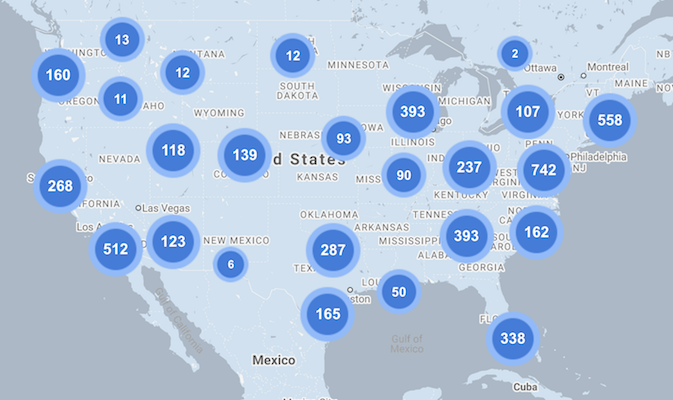

# Introduction

The objective of this project is to predict whether a company, given a number of features, will appear on Inc 5000 List of fastest-growing companies. Eligibility requirements in 2018 include:<br>
•	Revenue of no less than \$100,000 in 2014<br>
•	Rrevenue of no less than  \$2,000,000 in 2017<br>
•	Revenue in 2017 must exceed revenue in 2014<br>
•	Be in top 5000 (if the above 3 criteria are met, but company is placed below top 5000, it won't be included on the list)

# The Data

The data consists of 10K records, part of which comes from Inc5000 List for 2018 and can be found here: https://www.inc.com/inc5000list/json/inc5000_2018.json. The other half of the records was generated manually and includes both companies meeting the criteria and not. This is to make sure that the algorithm understands only 5000 records can be included in the list.<br>
<br>
Included are columns:<br>
•	inc_list            object - values: Y/N; signifies whether a company is on Inc 5000 List<br>
•	year                 int64 - values: 2018; the year of Inc 5000 List<br>
•	state_s             object - values: state ISO codes<br>
•	growth             float64 - values: numeric, continuous; % growth of company's revenue over 3 years<br>
•	revenue              int64 - values: numeric, continuous; company's revenue in 2017<br>
•	ifmid              float64 - values: numeric, discrete; metro id where company is located<br>
•	ifiid                int64 - values: numeric, discrete; industry id company is categorized by<br>
•	founded            float64 - values: numeric, discrete; the year when company was founded<br>
•	yrs_on_list          int64 - values: numeric, discrete; how many times company appeared on Inc 5000 List<br>
•	partner_lists/0     object - redundant column<br>
•	partner_lists/1     object - redundant column<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
inc5000 = pd.read_csv('inc5000_data.csv', header='infer')
inc5000.head()

,inc_list,year,state_s,growth,revenue,ifmid,ifiid,founded,yrs_on_list,partner_lists/0,partner_lists/1
0,Y,2018,CO,96422.08,109744415,31.0,4,2011.0,1,NaN,NaN
1,Y,2018,IL,81223.43,165781095,17.0,11,1997.0,1,NaN,NaN
2,Y,2018,WI,75660.84,98965631,78.0,6,2013.0,2,NaN,NaN
3,Y,2018,CO,71423.76,168837562,31.0,4,2010.0,1,NaN,NaN
4,Y,2018,IL,60165.51,255047839,17.0,11,2013.0,1,NaN,NaN


### Explore and clean the data

In [3]:
inc5000.describe()

,year,growth,revenue,ifmid,ifiid,founded,yrs_on_list
count,9998.0,9998.000000,9.998000e+03,9994.000000,9998.000000,9997.000000,9998.000000
mean,2018.0,595.681206,2.489156e+07,77.559936,12.588318,2003.548465,1.850570
std,0.0,2597.993865,2.020407e+08,166.324755,7.813736,21.899822,1.730368
min,2018.0,-99.000000,4.014000e+04,1.000000,1.000000,0.000000,1.000000
25%,2018.0,87.415000,3.106413e+06,8.000000,5.000000,1999.000000,1.000000
50%,2018.0,175.730000,5.953054e+06,21.000000,10.000000,2006.000000,1.000000
75%,2018.0,429.177500,1.341156e+07,59.000000,18.000000,2010.000000,2.000000
max,2018.0,102142.140000,1.643321e+10,1030.000000,29.000000,2014.000000,13.000000


In [4]:
#check data types for each column
inc5000.dtypes

inc_list            object
year                 int64
state_s             object
growth             float64
revenue              int64
ifmid              float64
ifiid                int64
founded            float64
yrs_on_list          int64
partner_lists/0     object
partner_lists/1     object
dtype: object

Drop columns with no metro id & founded and remove last 2 columns, which are redundant

In [5]:
inc5000=inc5000[(inc5000['ifmid']>0) & (inc5000['founded']>0)]
inc5000=inc5000.iloc[:,:-2]
inc5000.describe()

,year,growth,revenue,ifmid,ifiid,founded,yrs_on_list
count,9992.0,9992.000000,9.992000e+03,9992.000000,9992.000000,9992.000000,9992.000000
mean,2018.0,595.951286,2.489904e+07,77.563351,12.587970,2003.749299,1.850380
std,0.0,2598.748790,2.021010e+08,166.339752,7.815398,8.832820,1.729689
min,2018.0,-99.000000,4.014000e+04,1.000000,1.000000,1869.000000,1.000000
25%,2018.0,87.410000,3.107656e+06,8.000000,5.000000,1999.000000,1.000000
50%,2018.0,175.775000,5.953054e+06,21.000000,10.000000,2006.000000,1.000000
75%,2018.0,429.315000,1.340318e+07,59.000000,18.000000,2010.000000,2.000000
max,2018.0,102142.140000,1.643321e+10,1030.000000,29.000000,2014.000000,13.000000


Explore distribution by industry for general overview

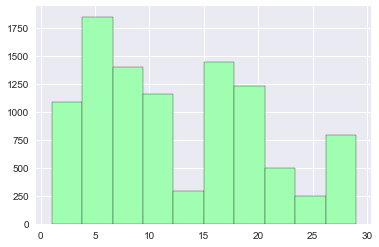

In [6]:
fig, ax = plt.subplots()
ax.hist(inc5000['ifiid'], color = 'xkcd:mint', edgecolor='black')
plt.show()

Explore distribution by metro for general overview

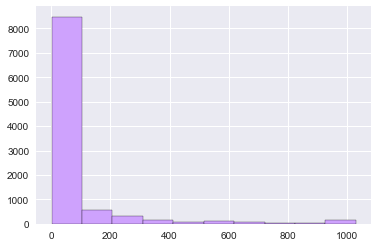

In [7]:
fig, ax = plt.subplots()
ax.hist(inc5000['ifmid'], color = 'xkcd:lilac', edgecolor='black')
plt.show()

Explore distribution by growth and revenue. Found small number of companies with high revenue/growth, but will keep those as they are not yet determined to be outliers that impact the analysis.

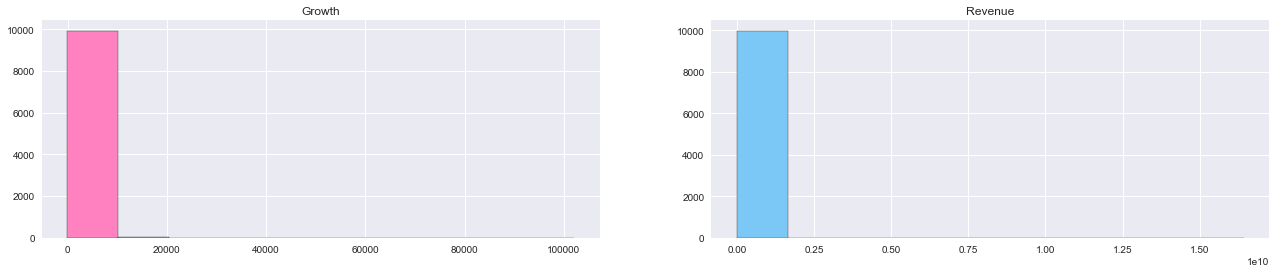

In [8]:
fig, ax = plt.subplots(1,2, figsize=(22,4))

ax[0].hist(inc5000['growth'], color = 'xkcd:pink', edgecolor='black')
ax[1].hist(inc5000['revenue'], color = 'xkcd:lightblue', edgecolor='black')
ax[0].set(title="Growth")
ax[1].set(title="Revenue")
plt.show()

### Feature Engineering

What's missing from the dataset, but is one of eligibility criteria, is base revenue (3 years ago). Let's add it, together with company age, to see if it's an important feature.

In [9]:
inc5000['age']=inc5000['year']-inc5000['founded']
inc5000['revenue_prev']=inc5000['revenue']/((inc5000['growth']/100)+1)

Drop year and founded as those are no longer needed for modeling

In [10]:
inc5000.drop(['year','founded'],axis=1,inplace=True)
inc5000.describe()

,growth,revenue,ifmid,ifiid,yrs_on_list,age,revenue_prev
count,9992.000000,9.992000e+03,9992.000000,9992.000000,9992.000000,9992.000000,9.992000e+03
mean,595.951286,2.489904e+07,77.563351,12.587970,1.850380,14.250701,1.235822e+07
std,2598.748790,2.021010e+08,166.339752,7.815398,1.729689,8.832820,7.140326e+07
min,-99.000000,4.014000e+04,1.000000,1.000000,1.000000,4.000000,4.844526e+04
25%,87.410000,3.107656e+06,8.000000,5.000000,1.000000,8.000000,8.382023e+05
50%,175.775000,5.953054e+06,21.000000,10.000000,1.000000,12.000000,2.205379e+06
75%,429.315000,1.340318e+07,59.000000,18.000000,2.000000,19.000000,6.540618e+06
max,102142.140000,1.643321e+10,1030.000000,29.000000,13.000000,149.000000,3.480801e+09


Visualize the data to see relationships between the features

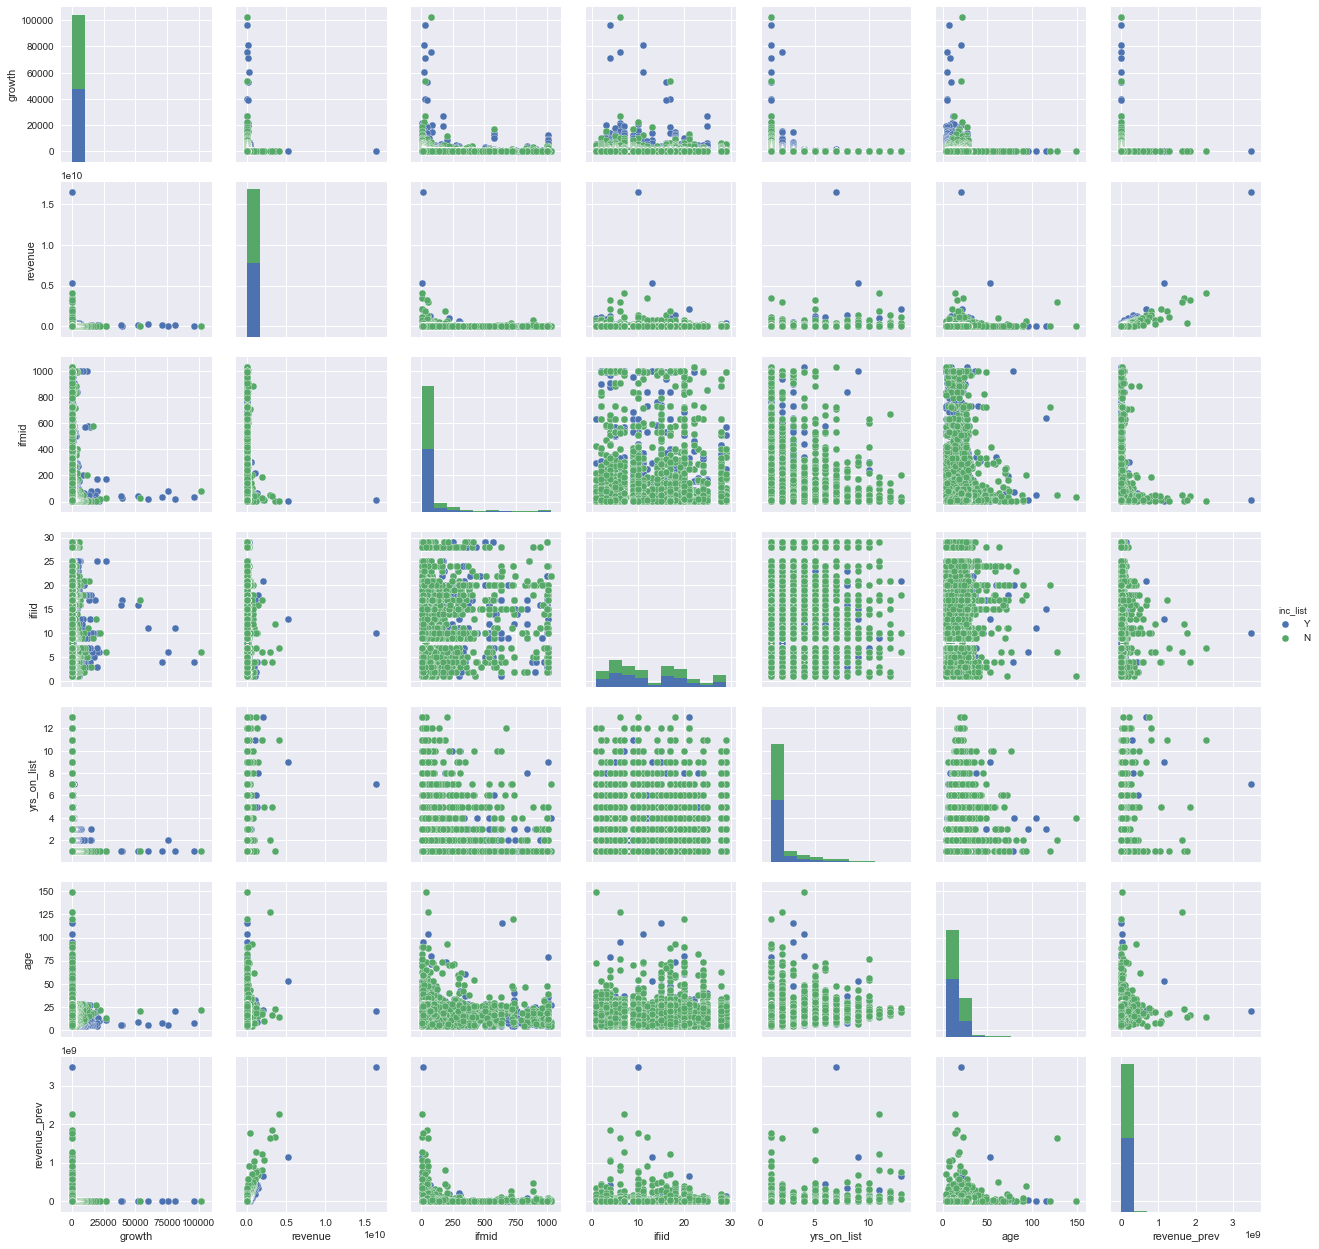

In [11]:
pair_plot = sns.pairplot(inc5000, hue='inc_list')

### One-Hot Encoding

Perform one-hot encoding for states and industry id's, move inc_list to be last column

In [12]:
inc5000 = pd.get_dummies(inc5000, columns=['state_s','ifiid'])
inc5000_2=inc5000.iloc[:, 0:1]
inc5000=inc5000.iloc[:, 1:]
inc5000['inc_list']=inc5000_2
inc5000.head()

,growth,revenue,ifmid,yrs_on_list,age,revenue_prev,state_s_AK,state_s_AL,state_s_AR,state_s_AZ,...,ifiid_19,ifiid_20,ifiid_21,ifiid_22,ifiid_23,ifiid_24,ifiid_25,ifiid_28,ifiid_29,inc_list
0,96422.08,109744415,31.0,1,7.0,113698.767163,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
1,81223.43,165781095,17.0,1,21.0,203854.036899,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
2,75660.84,98965631,78.0,2,5.0,130629.004377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
3,71423.76,168837562,31.0,1,8.0,236058.006458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y
4,60165.51,255047839,17.0,1,5.0,423206.970289,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Y


### Split and Standardize the Data

In [13]:
# Get X and y
#grab all features for X
X = inc5000.iloc[:, :-1].values

# inc_list is y-value - turn into binary
y = inc5000['inc_list'].map({'Y':1, 'N':0}).values

In [14]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

#random_state=1 random seed that keeps train and test split separate

In [15]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) #fit=find mean & standard deviation; trasform=standardize train data
X_test_std = stdsc.transform(X_test) #transform the test data
X_train_std[:5]

array([[-0.06156863, -0.21573965, -0.37078496, -0.49086597,  0.77208918,
        -0.19759781,  0.        , -0.10688517, -0.05355179, -0.15592196,
        -0.41439179, -0.16483301, -0.08399664, -0.09457287, -0.05219209,
        -0.28780229, -0.21243472, -0.03165218, -0.0739115 , -0.06989319,
         4.41704244, -0.11982583, -0.07865215, -0.0767902 , -0.07772662,
        -0.17245542, -0.15054611, -0.04145727, -0.13762047, -0.12757092,
        -0.1210477 , -0.02674715, -0.05487819, -0.16845824, -0.04478538,
        -0.07292725, -0.06672409, -0.17894152, -0.02392167, -0.09144489,
        -0.2578443 , -0.17113223, -0.06108472, -0.11223153, -0.19491914,
        -0.02674715, -0.03384003, -0.10824535, -0.04788445, -0.13434839,
        -0.30268555, -0.15252088, -0.25083447, -0.02674715, -0.14550249,
        -0.08820986, -0.03968947, -0.01691275, -0.12464557, -0.21932693,
        -0.22709292, -0.24694738, -0.32144766, -0.1856404 , -0.23020879,
        -0.01195827, -0.30716678, -0.29214844, -0.1

# The Machine Learning Models

In [16]:
# Logistic Regression
# --- Key Parameters ---
# C: the regularization strength (smaller values for greater regularization); default is 1.0
# penalty: used to specify the penalization used for regularizartion; l1 may be used for feature selection,
#          default is l2, 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# Support Vector Machine
# --- Key Parameters ---
# C: how much penalty there is for misclassification (smaller values for greater penalty); default is 1.0
# kernel: specifies the kernel type to be used (often 'rbf' or 'linear'); default is 'rbf'
# gamma: the coefficient for non-linear kernels
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
# --- Key Parameters ---
# n_estimators: the number of trees in the forest; default is 10
# max_depth: the depth of the tree; defualt is None, full expansion
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
# --- Key Parameters ---
# n_neighbors: number of neighbors to use; default is 5
# weights: weight function used; default is 'uniform'
        # 'uniform' means all points are weighted equally; '
        # 'distance' means closer points have greater influence;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Neural Network
# --- Key Parameters ---
# hidden_layer_sizes: a tuple representing the number of nodes for respective layer; default is (100,)
# activation: the activation function for the hidden layer; defualt is 'relu'
        # usually 'relu', 'tanh', or 'logistic' ('sigmoid')
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

## Feature Selection

**Random Forest Classifier** can identify the importance of each feature

In [17]:
from sklearn.ensemble import RandomForestClassifier

# n_jobs is the number of jobs to run in parallel for both 'fit' and 'predict'. 
# If set to -1, then the number of jobs is set to the number of cores.

rf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rf.fit(X_train_std, y_train)


feature_importances = rf.feature_importances_

# feature importances will always sum to 1
print("Feature importances:\n{}".format(feature_importances))

Feature importances:
[6.11426480e-01 1.48706776e-01 1.01056894e-02 1.46556293e-02
 3.19754243e-02 1.41489592e-01 0.00000000e+00 4.25773440e-04
 2.28000017e-04 5.34085819e-04 1.40587909e-03 8.39268664e-04
 2.56090121e-04 4.09586304e-04 1.99257323e-04 9.91546793e-04
 8.01274500e-04 5.89404168e-05 2.20175121e-04 2.28195768e-04
 8.47184445e-04 3.75786752e-04 4.48455771e-04 2.33451277e-04
 1.76470758e-04 5.68310140e-04 5.78853821e-04 8.74320106e-05
 3.82067466e-04 7.78843360e-04 4.17184956e-04 5.64291896e-05
 2.03993952e-04 6.81201104e-04 1.24288708e-04 4.16440583e-04
 2.14436555e-04 6.14802533e-04 3.98044231e-05 3.35113304e-04
 1.01241590e-03 5.50331069e-04 1.37039954e-04 3.65428427e-04
 6.36589704e-04 3.37792728e-05 1.56780452e-04 3.64489937e-04
 1.07030382e-04 3.82998882e-04 1.01867145e-03 5.18819328e-04
 7.81271376e-04 3.51063307e-05 4.21121327e-04 3.50952780e-04
 4.81952415e-05 1.72310778e-05 4.99532769e-04 8.70610719e-04
 8.65707386e-04 8.42047960e-04 1.53879615e-03 7.25935645e-04
 9.

In [18]:
# feature_importance array needs to be reshaped; it is a vector of shape (85,), it needs to be shaped (1,85)
most_important_features = pd.DataFrame(feature_importances.reshape(1,-1), columns=inc5000.columns[:-1], index = ["importance"])
most_important_features

,growth,revenue,ifmid,yrs_on_list,age,revenue_prev,state_s_AK,state_s_AL,state_s_AR,state_s_AZ,...,ifiid_18,ifiid_19,ifiid_20,ifiid_21,ifiid_22,ifiid_23,ifiid_24,ifiid_25,ifiid_28,ifiid_29
importance,0.611426,0.148707,0.010106,0.014656,0.031975,0.14149,0.0,0.000426,0.000228,0.000534,...,0.000882,0.000525,0.00109,0.000936,0.000629,0.000367,0.000549,0.000288,0.001283,0.000572


Get the indices of the most important features sorted by importance

In [19]:
# sort the feature importances but show their original index position

feature_importance_inorder_mask = np.argsort(feature_importances)[::-1]
feature_importance_inorder_mask

array([ 0,  1,  5,  4,  3,  2, 62, 10, 83, 74, 66, 77, 50, 40, 15, 64, 67,
       78, 75, 59, 60, 20, 61, 11, 68, 69, 16, 52, 29, 63, 33, 72, 44, 79,
       37, 26, 73, 84, 25, 41, 81,  9, 76, 51, 58, 71, 22,  7, 54, 30, 35,
       70, 13, 49, 28, 21, 80, 43, 47, 55, 39, 82, 12, 23, 19,  8, 18, 36,
       32, 14, 24, 46, 42, 34, 48, 27, 17, 31, 56, 38, 53, 45, 57, 65,  6])

In [21]:
# convert columns from an Index object to a numpy array so that we can pass a list/mask to it
features = np.array(inc5000.columns)

best_features = list(features[feature_importance_inorder_mask])

# display the best features in order
print("The best features in order: \n{}".format(best_features))

The best features in order: 
['growth', 'revenue', 'revenue_prev', 'age', 'yrs_on_list', 'ifmid', 'ifiid_5', 'state_s_CA', 'ifiid_28', 'ifiid_17', 'ifiid_9', 'ifiid_20', 'state_s_TX', 'state_s_NY', 'state_s_FL', 'ifiid_7', 'ifiid_10', 'ifiid_21', 'ifiid_18', 'ifiid_2', 'ifiid_3', 'state_s_IL', 'ifiid_4', 'state_s_CO', 'ifiid_11', 'ifiid_12', 'state_s_GA', 'state_s_VA', 'state_s_MN', 'ifiid_6', 'state_s_NC', 'ifiid_15', 'state_s_PA', 'ifiid_22', 'state_s_NJ', 'state_s_MD', 'ifiid_16', 'ifiid_29', 'state_s_MA', 'state_s_OH', 'ifiid_24', 'state_s_AZ', 'ifiid_19', 'state_s_UT', 'ifiid_1', 'ifiid_14', 'state_s_KS', 'state_s_AL', 'state_s_WA', 'state_s_MO', 'state_s_NE', 'ifiid_13', 'state_s_DC', 'state_s_TN', 'state_s_MI', 'state_s_IN', 'ifiid_23', 'state_s_OR', 'state_s_SC', 'state_s_WI', 'state_s_NV', 'ifiid_25', 'state_s_CT', 'state_s_KY', 'state_s_ID', 'state_s_AR', 'state_s_IA', 'state_s_NH', 'state_s_MT', 'state_s_DE', 'state_s_LA', 'state_s_RI', 'state_s_OK', 'state_s_ND', 'state_s_S

Keep only 3 most importan features

In [22]:
from sklearn.feature_selection import SelectFromModel

# threshold: may be set to None (which defaults to mean),'median', number between 0 and 1
# prefit=True tells it to use the model that we've already fit above

sfm = SelectFromModel(rf, threshold=0.1, prefit=True) #this will give features with >10% importance

# Get the indices of the most important features
most_important_features = sfm.get_support(indices=True)
print("Indices of the most important fatures:", most_important_features)

Indices of the most important fatures: [0 1 5]


Transform the data to include just the 3 most important features

In [24]:
X_train_std = sfm.transform(X_train_std)
print("Shape of X_train dataset with only the most important features: ", X_train_most_important_features.shape)

Shape of X_train dataset with only the most important features:  (6994, 3)


Need to transform the test set as well

In [25]:
X_test_std = sfm.transform(X_test_std)

## Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score #K-fold cross validation
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10) #this gives 5 accuracies for log_reg

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [27]:
display_scores(scores)

Scores: [0.88302425 0.85857143 0.87857143 0.91273247 0.88268956 0.86981402
 0.90128755 0.85264664 0.88984263 0.8683834 ]
Mean: 0.879756338861333
Standard deviation: 0.017565217733134558


In [28]:
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [29]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])
models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.883024,0.858571,0.878571,0.912732,0.88269,0.869814,0.901288,0.852647,0.889843,0.868383
KNN,0.968616,0.980000,0.978571,0.969957,0.97568,0.972818,0.977110,0.974249,0.977110,0.978541
SVM,0.798859,0.761429,0.788571,0.801144,0.79113,0.768240,0.804006,0.762518,0.788269,0.763948
Forest,0.998573,1.000000,1.000000,0.998569,1.00000,0.998569,1.000000,1.000000,0.997139,0.998569
NN,0.947218,0.951429,0.967143,0.958512,0.95422,0.968526,0.965665,0.955651,0.959943,0.959943


In [30]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.883024,0.858571,0.878571,0.912732,0.88269,0.869814,0.901288,0.852647,0.889843,0.868383,0.879756
KNN,0.968616,0.980000,0.978571,0.969957,0.97568,0.972818,0.977110,0.974249,0.977110,0.978541,0.975265
SVM,0.798859,0.761429,0.788571,0.801144,0.79113,0.768240,0.804006,0.762518,0.788269,0.763948,0.782811
Forest,0.998573,1.000000,1.000000,0.998569,1.00000,0.998569,1.000000,1.000000,0.997139,0.998569,0.999142
NN,0.947218,0.951429,0.967143,0.958512,0.95422,0.968526,0.965665,0.955651,0.959943,0.959943,0.958825


## Boxplot and Model Selection

Text(0.5,1,'Classification Accuracy using All Features')

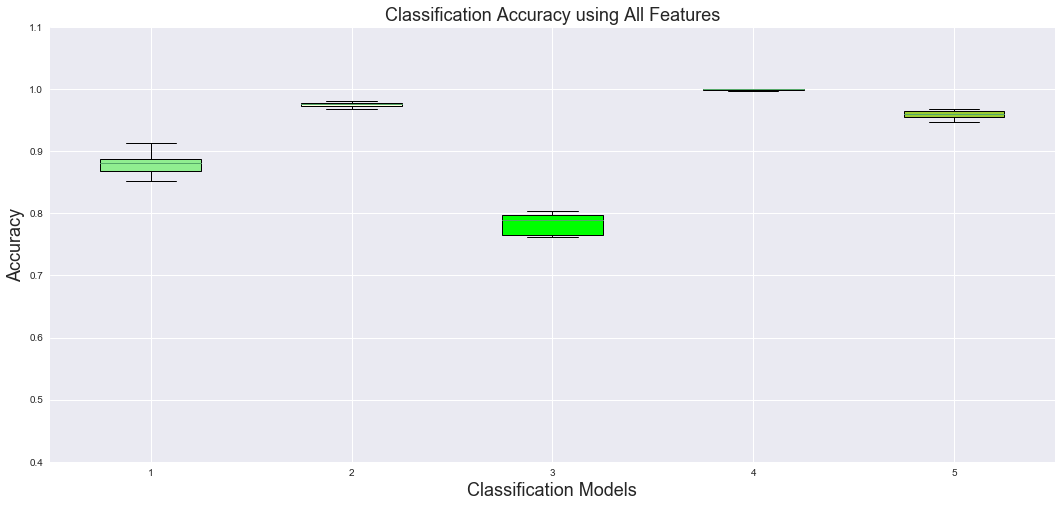

In [31]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))]) #add names for each graph
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

Random forest is a clear winner so let's use it for further fine-tunement.

## Hyperparameter Tuning (Grid Search)

In [34]:
# Grid Search (Random Forest) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9992851015155848 
Test score: 0.9993328885923949


## Confusion Matrix

             precision    recall  f1-score   support

      other       1.00      1.00      1.00      1483
 versicolor       1.00      1.00      1.00      1515

avg / total       1.00      1.00      1.00      2998



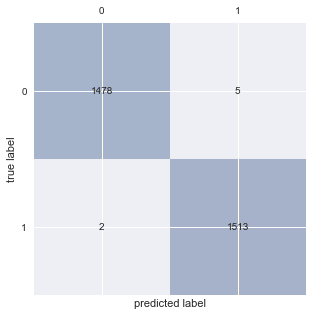

In [35]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["other", "versicolor"]))

Perfect scores on presicion and recall, proving the efficiency of the model.

# Conclusion

When first working with this data, I combined 11 years of history (2007-2018) in hopes to predict variables like growth, revenue, age and industry. After several unsuccessful attempts and many passes at cleaning up the data, I took a step back to think about what it represents. The list of companies is a self-selection mechanism rather than a fair representation of all existing private firms. The companies need to apply in order to get on the list, thus is may be a biased selection that includes only the ones interested in getting recognition.<br>
<br>
Instead, in order to test out machine learning capabilities, I generated half of the data intentionally, knowing all necessary criteria. Random forest picked up on this and generated a nearly-perfect score on both traing and test data.<br>
<br>
For future exercises, I might use the dataset from 11 years of Inc 5000 history to analyze performance of the companies that appeared on the list multiple times (more than half have been listed 2+ times) and potentially predict their future revenue and growth patterns.